In [1]:
print('Hello world')

Hello world


### Psuedocode
A curve fitting procedure to determine the discharge rate constant, the n factor for the discharge rate, and the specific capacity. We use the model outlined by *R. Tian & S. Park et. al.* https://www.nature.com/articles/s41467-019-09792-9

In [2]:
    import math
    import numpy as np

    import pandas as pd
    import scipy
    from scipy.optimize import curve_fit


    def fit3DliIB(filepath, params0):
        '''
        A curve fitting procedure to determine the discharge
        rate constant, the n factor for the discharge rate,
        and the specific capacity. We use the model outlined
        by *R. Tian & S. Park et. al.*
        https://www.nature.com/articles/s41467-019-09792-9
        Input Arguments
        filepath : string, to filepath (csv format)
                   first column is xdata, second, ydata
        params0 : 1 by 3 numpy array, with elemets, tau (the
        characteristic lifetime), n (the rate discharge coef-
        ficient), and Q the specific capacity
        Output Argument
        Return the optimized parameters tau, n, Qcapacity
        '''
        # import data
        pd.read_csv(filepath)
        Rdischarge = dframe.iloc[: , 0].to_numpy()
        normQdata = dframe.iloc[: , 1].to_numpy()
  
        # Fit procedure
        popt, pcov = curve_fit(fitfunc, Rdischarge, normQdata, p0=params0)
        return popt

In [3]:
        # define fit function
        def fitfunc(Rdischarge, tau, n, Qcapacity):
            '''
            Capacity versus rate discharge model outlined by
            https://www.nature.com/articles/s41467-019-09792-9
            '''
            normQ \
             = Qcapacity * \
               (1 - (Rdischarge * tau)**n * \
               (1 - np.exp( - (Rdischarge * tau)**( - n)))
               )
            return normQ

## Demo of Curve fit Method
A curve fitting procedure to determine the discharge rate constant, the n factor for the discharge rate, and the specific capacity. We use the model outlined by *R. Tian & S. Park et. al.* https://www.nature.com/articles/s41467-019-09792-9

In [4]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

In [5]:
filepath = './3dLiIBattery/data/capacityratepaper1set1.csv'
dframe = pd.read_csv(filepath)
xdata = dframe.iloc[: , 0].to_numpy()
ydata = dframe.iloc[: , 1].to_numpy()
dframe.columns

Index(['C rate', 'Capacity (mAh/g)'], dtype='object')

In [6]:
dframe.head()

,C rate,Capacity (mAh/g)
0,0.026661,110.350768
1,0.147635,99.595634
2,0.279776,96.285964
3,0.566392,85.000231
4,0.838584,75.122293


### Implementation of fit3DliIB procedure as curvefit module and Visulize optimized parameters

In [7]:
# parameters
tau = 0.5; n = 1; Qcapacity = 100;
params0 = [tau, n, Qcapacity]  # intial guess parameter
popt = fit3DliIB(filepath, params0)

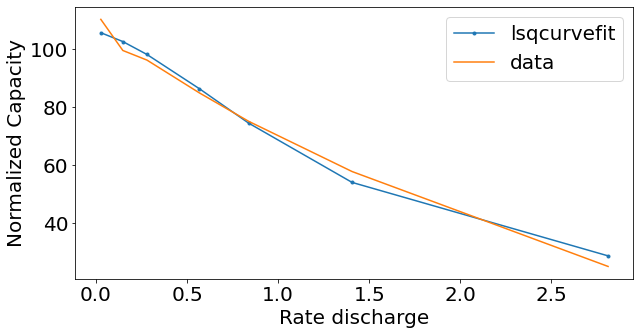

In [8]:
### Visualize Result with optimized parameters
tau = popt[0]
n = popt[1]
specificcapacity = popt[2]
Rdischarge = xdata
normQopt = fitfunc(Rdischarge, tau, n, specificcapacity)

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
ax.plot(Rdischarge, normQopt, '.-', label='lsqcurvefit')
ax.plot(xdata, ydata, label='data')
ax.set_xlabel('Rate discharge')
ax.set_ylabel('Normalized Capacity')
ax.legend()